## Indice dei contenuti

- [Import delle librerie](#Import-delle-librerie)
- [Caricamento in memoria del dataset](#Caricamento-in-memoria-del-dataset)
- [Analisi Esplorativa](#Analisi-Esplorativa)
- [Preprocessing](#Preprocessing)
    - [Z-Normalization](#Z-Normalization)
    - [Trasformazione della feature target da categorico a numerico](#Trasformazione-della-feature-target-da-categorico-a-numerico)
    - [Creazione del nuovo dataframe](#Creazione-del-nuovo-dataframe)
    - [Split dei dati in train e test set](#Split-dei-dati-in-train-e-test-set)
- [GridSearch e Funzioni di Attivazione](#GridSearch-e-Funzioni-di-Attivazione)
- [Valutazione](#Valutazione)

## Import delle librerie

In [1]:
#Import delle librerie
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Caricamento in memoria del dataset

In [2]:
data = pd.read_csv("./input/Iris.csv") 
data.sample(5) #Stampa di alcuni elementi del dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica
35,36,5.0,3.2,1.2,0.2,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa


## Analisi Esplorativa

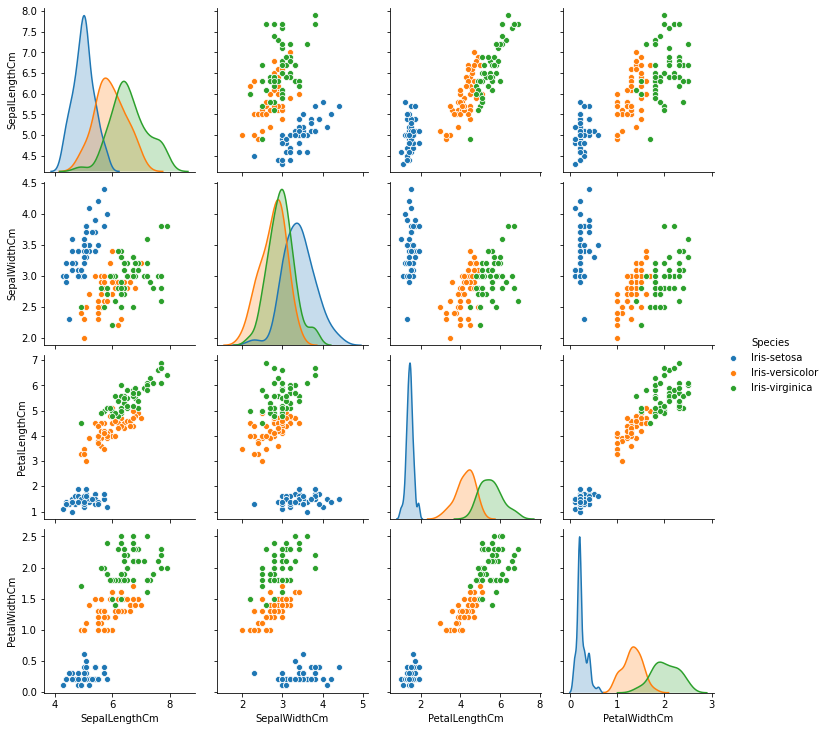

In [3]:
import seaborn as sns
sns.pairplot( data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Preprocessing

### Z Normalization

La standardizzazione è un procedimento che riconduce una variabile aleatoria distribuita secondo una media μ e varianza σ2, ad una variabile aleatoria con distribuzione "standard", ossia di media zero e varianza pari a 1. È particolarmente utile nel caso della variabile casuale normale per il calcolo della funzione di ripartizione e dei quantili con le tavole della normale standard. Infatti i valori della distribuzione normale sono tabulati per media zero e varianza unitaria.

Il procedimento prevede di sottrarre alla variabile aleatoria la sua media e dividere il tutto per la deviazione standard (per σ e non per σ2), ovvero utilizzando la formula utile a trovare i punti zeta (Z-score o standard score):

<img align="center" src="https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2020/04/04155631/1426878678.png"/>

In [5]:
df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
27,0.250000,0.625000,0.084746,0.041667
25,0.194444,0.416667,0.101695,0.041667
118,0.944444,0.250000,1.000000,0.916667
21,0.222222,0.708333,0.084746,0.125000
34,0.166667,0.458333,0.084746,0.000000


In [6]:
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


### Trasformazione della feature target da categorico a numerico

In [7]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(n=5)

,Species
76,1
27,0
54,1
42,0
111,2


### Creazione del nuovo dataframe

In [8]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
96,0.388889,0.375000,0.542373,0.500000,1
90,0.333333,0.250000,0.576271,0.458333,1
65,0.666667,0.458333,0.576271,0.541667,1
48,0.277778,0.708333,0.084746,0.041667,0
88,0.361111,0.416667,0.525424,0.500000,1


### Split dei dati in train e test set

In [9]:
train, test = train_test_split(df, test_size = 0.3)
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

## GridSearch e Funzioni di Attivazione

Di seguito vengono riportate le possibili funzioni di attivazione utilizzate per l'aggiornamento dei pesi dei neuroni.
Tali funzioni vengono valutate mediante una GridSearch, in modo da individuare la combinazione migliore di parametri.


1. <b>relu</b>: La Rectifier Function è la funzione di attivazioni più utilizzata. Restituisce 0 qualora la somma pesata dei segnali in input è minore o uguale a zero, oppure ΣwX negli altri casi. Il codominio della funzione spazia in questo caso da 0 ad infinito.
2. <b>selu</b>: E' una variante della relu. Per valori positivi, restituisce ΣwX, per valori negativi, l'andamento della funzione ricorda il grafico della funzione logaritmo. Può essere utilizzata quando la funzione relu crea il problema noto come "dying relu", ovvero quando tutti gli output assumono tutti lo stesso valore. Questo accade quando si è in presenza di valori molto piccoli, quindi prossimi allo zero. Dato che il gradiente di zero è zero, la rete neurale non è in grado di aggiornare i pesi.
3. <b>tanh</b>: si comporta come la sigmoide, ma il range di valori è [-1, 1]. Il vantaggio è che gli input saranno mappati fortemente in modo negativo, e i valori prossimi allo zero saranno mappati come zero in tanh.
5. <b>sigmoid</b>: in questo caso il codominio della funzione, ovvero i valori che può restituire il neurone, spazia tra 0 ed 1 in un intervallo continuo. Infatti, la caratteristica di questa funzione è che smussata. Può essere utilizzata al posto della Threshold Function considerando il valore in uscita non come Y ma come probabilità che Y sia uguale ad uno, ovvero Prob(Y=1).

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

grid = {'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu']}
clf_cv = GridSearchCV(MLPClassifier(random_state=1, max_iter=5000, hidden_layer_sizes=(3,3), alpha=1e-5), grid, n_jobs=-1, cv=10)

clf_cv.fit(X_train, y_train)

print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",clf_cv.best_params_)
best_config_gs = clf_cv.best_params_
print("Accuracy CV:",clf_cv.best_score_)
ppn_cv = clf_cv.best_estimator_
print('Test accuracy: %.3f' % clf_cv.score(X_test, y_test))


GridSearch():

Per l'applicazione della GridSearch ci sono 12 combinazioni
Migliore configurazione:  {'activation': 'identity', 'solver': 'lbfgs'}
Accuracy CV: 0.9636363636363636
Test accuracy: 1.000


Nello snippet seguente viene creato un MLPClassifier che abbia come parametri queli del miglior modello individuato dalla GridSearch.

In [11]:
mlp = MLPClassifier(random_state=1, max_iter=5000, hidden_layer_sizes=(3,3), alpha=1e-5, **best_config_gs)

mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

## Valutazione

Successivamente viene creata una matrice di confusione e un report di classificazione per il Train Set, individuando una serie di misure utili alla valutazione.

In [12]:
#Matrice di confusione e report di classificazione per il Train
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[34  0  0]
 [ 0 32  1]
 [ 0  1 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.97      0.97        33
           2       0.97      0.97      0.97        38

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



Infine la stessa matrice e lo stesso report vengono creati per il Test Set.

In [13]:
#Matrice di confusione e report di classificazione per il Test
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[16  0  0]
 [ 0 17  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

